## Name of project- stock market prediction 

#### description-

for most stock investors, the favorite question is "how long should we hold a stock for?". 
every investor wants to know how not to act too fearful and too greedy. and not all of them have warren buffet to guide them at every step. i'd suggest that you stop looking for him. rather, build your stock market predictor with artificial intelligence tools like machine learning. and the approach to this is so simple that you can consider adding this to your data science projects list.

In [1]:
# importing packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Load Data

df = pd.read_csv("GOOG.csv")

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [7]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [8]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### Feature scaling 

Feature scaling is a technique used in data preprocessing that aims to standardize the range of values of the different features (or variables) in a dataset. The purpose of feature scaling is to bring all features onto the same scale so that they can be compared and analyzed more effectively.

When features in a dataset have different ranges, some algorithms may give more weight to features with larger scales, which could lead to biased results. Feature scaling solves this issue by transforming the values of each feature into a common range, typically between 0 and 1 or -1 and 1, so that each feature contributes equally to the analysis.

Commonly used scaling techniques include Min-Max scaling, Standardization (Z-score normalization), Log transformation, and others.

#### Below code explanation

This code is performing feature scaling on a dataset called df, specifically on the columns 'Open', 'High', 'Low', 'Close' and 'Volume'. Feature scaling is a common technique used to standardize the range of values of features in a dataset.

The MinMaxScaler() function is used to scale the values of the 'Open', 'High', 'Low', and 'Close' columns to be within a certain range (usually between 0 and 1). This is done by subtracting the minimum value of the column from each value and then dividing by the range (max value minus min value).

The same scaling technique is applied to the 'Volume' column, but with one difference. The .values.reshape(-1,1) method is used to reshape the column values into a 2D array with one column and as many rows as there are values. This is because the fit_transform() method requires a 2D array as input.

After scaling, the scaled values are assigned back to the respective columns of df.

In [11]:
# Data Processing
# Feature Scaling

scalar = MinMaxScaler()
df[['open','high','low','close']] = scalar.fit_transform(df[['open','high','low','close']])
df['volume'] = scalar.fit_transform(df['volume'].values.reshape(-1,1))


In [7]:
df['Volume']

0        0.011219
1        0.008708
2        0.020533
3        0.017937
4        0.027936
           ...   
19581    0.006414
19582    0.006234
19583    0.005057
19584    0.006089
19585    0.005344
Name: Volume, Length: 19586, dtype: float64

In [12]:
df['volume'].max()

1.0

In [13]:
df['open']

0       0.024532
1       0.025891
2       0.023685
3       0.020308
4       0.014979
          ...   
1253    0.960300
1254    0.975716
1255    0.986289
1256    0.983327
1257    1.000000
Name: open, Length: 1258, dtype: float64

In [14]:
df['open'].max()

1.0

In [15]:
df['open'].min()

0.0

In [16]:
df['high']

0       0.027050
1       0.027325
2       0.023912
3       0.019691
4       0.016272
          ...   
1253    0.968194
1254    0.982480
1255    0.988144
1256    0.997989
1257    1.000000
Name: high, Length: 1258, dtype: float64

In [17]:
# Feature Selection

X = df[['open','high','low','close']]
y = df['volume']


In [18]:
X

,open,high,low,close
0,0.024532,0.027050,0.027158,0.026984
1,0.025891,0.027325,0.029442,0.027334
2,0.023685,0.023912,0.021785,0.022716
3,0.020308,0.019691,0.013715,0.012658
4,0.014979,0.016272,0.016417,0.013732
...,...,...,...,...
1253,0.960300,0.968194,0.968819,0.970049
1254,0.975716,0.982480,0.983624,0.979092
1255,0.986289,0.988144,0.994027,0.983705
1256,0.983327,0.997989,0.997662,1.000000


In [19]:
y

0       0.163697
1       0.148076
2       0.279120
3       0.521410
4       0.296195
          ...   
1253    0.144311
1254    0.154686
1255    0.112552
1256    0.207325
1257    0.156231
Name: volume, Length: 1258, dtype: float64

In [20]:
# Splitting the data into training and Testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train.count()

open     1006
high     1006
low      1006
close    1006
dtype: int64

In [22]:
X_test.count()

open     252
high     252
low      252
close    252
dtype: int64

In [23]:
y_train.count()

1006

In [24]:
y_test.count()

252

## LSTM

An LSTM (Long Short-Term Memory) model is a type of recurrent neural network (RNN) that is designed to handle sequential data, such as time-series or text data.

At its core, an LSTM model consists of a series of memory cells that can store information for an extended period of time. These memory cells are connected by a network of gates that regulate the flow of information into and out of the cells.

Each gate is composed of a sigmoid activation function and a point-wise multiplication operation. The sigmoid function acts as a switch that controls the flow of information, while the multiplication operation scales the input data.

There are three main types of gates in an LSTM model:

- The forget gate, which determines what information to discard from the cell.
- The input gate, which decides what new information to store in the cell.
- The output gate, which determines what information to output from the cell.


The LSTM model is trained using a process called backpropagation through time (BPTT), which adjusts the weights of the gates based on the error between the predicted output and the actual output.

Overall, the LSTM model is a powerful tool for handling sequential data due to its ability to selectively store and retrieve information over long periods of time. It has been successfully applied to a wide range of tasks, including speech recognition, language translation, and time-series forecasting.

#### Is it mandatory to convert our data into 3D

Yes, it is mandatory to format the data as a 3D tensor for input to an LSTM model.

The reason for this is that an LSTM model is designed to handle sequential data, which is inherently three-dimensional. In other words, the input to an LSTM model should be a three-dimensional tensor with shape (batch_size, time_steps, num_features).

- batch_size: This is the number of samples in each batch of data.
- time_steps: This is the number of time steps in each sample, representing the sequence length.
- num_features: This is the number of features (or variables) in each time step.
For example, if you are using an LSTM model to forecast stock prices, batch_size would be the number of companies you are forecasting for, time_steps would be the number of days in the forecast horizon, and num_features would be the number of input variables (such as opening price, closing price, volume, etc.) for each day.

The data needs to be reshaped into this format before being fed into the LSTM model, typically using the reshape() function in NumPy or the reshape() method in TensorFlow or Keras.

In [25]:
# Reshape data to be 3D for LSTM model

from keras.layers import  LSTM

X_train = np.reshape(X_train.values,(X_train.shape[0],X_train.shape[1],1))

X_test = np.reshape(X_test.values,(X_test.shape[0],X_test.shape[1],1))

In [22]:
X_train

array([[[0.00334357],
        [0.00334161],
        [0.00334689],
        [0.00335825]],

       [[0.00071056],
        [0.00070524],
        [0.00069398],
        [0.00069043]],

       [[0.01420661],
        [0.01412168],
        [0.01392884],
        [0.01381124]],

       ...,

       [[0.02504974],
        [0.02598379],
        [0.02547948],
        [0.0256637 ]],

       [[0.00326468],
        [0.00326922],
        [0.00323958],
        [0.00325511]],

       [[0.06532931],
        [0.06569702],
        [0.06641517],
        [0.06609154]]])

### Define LSTM model architecture


LSTM model architecture refers to the structure and design of a Long Short-Term Memory (LSTM) neural network that is used to analyze sequential data, such as time-series or text data.


The LSTM model consists of a series of memory cells that can store information for an extended period of time. These memory cells are connected by a network of gates that regulate the flow of information into and out of the cells.


The LSTM model architecture typically includes the following components:

    
- Input layer: This layer receives the input data and passes it on to the next layer.

- LSTM layer: This layer consists of a series of memory cells connected by gates. The LSTM layer processes the input data sequentially, storing and retrieving information as needed.

- Output layer: This layer produces the output of the model, which can be a single value (for regression tasks) or a set of probabilities (for classification tasks).

- Activation functions: The LSTM model typically includes activation functions, such as sigmoid and tanh, that are used to regulate the flow of information through the gates and memory cells.

- Loss function: This function measures the error between the predicted output and the actual output, and is used to guide the training of the model.

- Optimization algorithm: This algorithm is used to minimize the loss function and adjust the weights of the model during training.

    
    
The specific architecture of an LSTM model can vary depending on the task and the data being analyzed. However, the core components described above are common to most LSTM models

In [26]:
# Define LSTM model architecture

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [27]:
# Compile the model 

from sklearn.metrics import mean_squared_error

model.compile(loss='mean_squared_error',optimizer = 'adam')

In [33]:
# Train the model

Train_Model = model.fit(X_train,y_train,epochs=60,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/60
490/490 [==============================] - 4s 8ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/60
490/490 [==============================] - 5s 11ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/60
490/490 [==============================] - 5s 11ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/60
490/490 [==============================] - 6s 11ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/60
490/490 [==============================] - 5s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/60
490/490 [==============================] - 5s 11ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/60
490/490 [==============================] - 5s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/60
490/490 [==============================] - 6s 11ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/60
490/490 [==============================] - 6s 12ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/60
490/490 [==============================] - 6s 11ms/step - loss: 0.0012 - val_los

In [28]:
# Evaluation of the model

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root_Mean_Squared_Error is :",rmse)

8/8 [==============================] - 2s 9ms/step
Root_Mean_Squared_Error is : 0.24953408959306211


In [ ]:
# Visualize training and validation loss


plt.plot(Train_Model.history['loss'],label='Training LOSS' )
plt.plot(Train_Model.history['val_loss'],label='Validation LOSS' )
plt.legend()
plt.show()

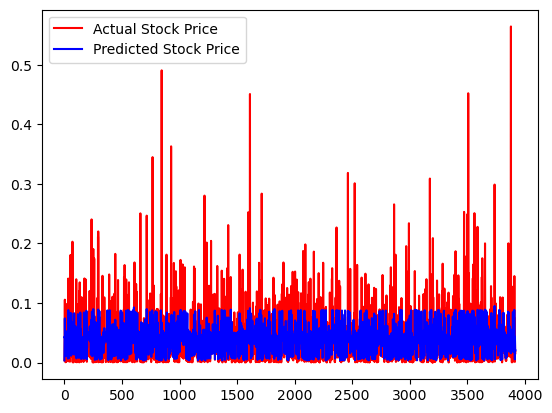

In [32]:
# Visualize actual vs predicted stock prices

plt.plot(y_test.values, color='red', label='Actual Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.legend()
plt.show()
     